> Part 3
- In the first cell of your notebook, import the required packages with their customary aliases

In [2]:
# Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Part 4
- The original csv had two rows attached to the bottom that contained an index.
- The csv() call was modified by passing "skipfooter_2" to correct this issue. 
- The original csv file was not modified.

In [3]:
#Drop last two cells to remove index at bottom.
gdp_df = pd.read_csv('../data/Undata.csv', 
    skipfooter=2, engine='python')
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2019  2065.036398              NaN
1        Afghanistan  2018  2033.779002              NaN
2        Afghanistan  2017  2058.383832              NaN
3        Afghanistan  2016  2057.062164              NaN
4        Afghanistan  2015  2068.265904              NaN
...              ...   ...          ...              ...
6863        Zimbabwe  1994  3263.934978              NaN
6864        Zimbabwe  1993  3033.504852              NaN
6865        Zimbabwe  1992  3054.889178              NaN
6866        Zimbabwe  1991  3426.598094              NaN
6867        Zimbabwe  1990  3324.348171              NaN

[6868 rows x 4 columns]


>  Part 5
- Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'


In [4]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
print(gdp_df.head(n=1))

       Country  Year  GDP_Per_Capita
0  Afghanistan  2019     2065.036398


> Part 6
- How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.
    - There are 3 columns and 6868 rows. 
    - Dataypes are #0 - Object, #2 - int64, #3 - float64.
    - I don't think there is anything wrong with Dypes.

In [5]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB
None


> Part 7 
- Which years are represented in this dataset? 
    - The years 1990 - 2017 are represented in the dataset.
- Take a look at the number of observations per year. What do you notice?
    - The number of observations per year seems to trend upward.

In [6]:
gdp_df["Year"].value_counts().sort_index()

#.plot if your're feeling froggy

1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64

>  Part 8 
- How many countries are represented in this dataset?
    - There are 238 countries represented in the dataset.
- Which countries are least represented in the dataset?
    - Djibouti, Turks and Caicos Islands, Sint Maarten (Dutch part), Cayman Islands, and Nauru
- Why do you think these countries have so few observations?
    - Perhaps they have not been members of the UN as long as others.

In [7]:
gdp_df['Country'].value_counts()

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

> Part 9
- Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [8]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]
print(gdp_2014)

                  Country  Year  GDP_Per_Capita
5             Afghanistan  2014     2102.385234
23                Albania  2014    11623.866679
53                Algeria  2014    11512.705405
83                 Angola  2014     8239.828837
113   Antigua and Barbuda  2014    18104.241470
...                   ...   ...             ...
6727              Vietnam  2014     6098.489609
6757   West Bank and Gaza  2014     5967.073437
6783                World  2014    15189.648507
6813               Zambia  2014     3450.046561
6843             Zimbabwe  2014     2955.240287

[238 rows x 3 columns]


> Part 10
- Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [9]:
gdp_2014["GDP_Per_Capita"].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

> Part 11
- Create a histogram of GDP Per Capita numbers for 2014 
- How would you describe the shape of the distribution?
    - The distribution appears to be skewed to the right

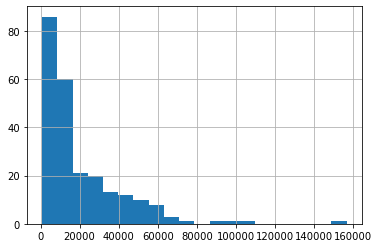

In [10]:
gdp_2014["GDP_Per_Capita"].hist(bins=20);
plt.show()

> Part 12 
- For GDP per capita in 2014 find:
- Top 5 counties
    - Macao SAR, China, Luxembourg, Qatar, Singapore, Bermuda
- Bottom 5 countries
    - Niger, Dem. Rep. Congo, Malawi, Burundi, Central African Republic

In [11]:
#michael reccommends not using this method outside of the context of 
#this particular problem
gdp_2014.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881
...,...,...,...
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777


> Part 13.
- return to the full dataset, `gdp_df`. 
- Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that: 
    - each row corresponds to a country
    - each column corresponds to a year
    - the values in the table give the GDP_Per_Capita amount. 
- Drop any rows that are missing values for either 1990 or 2017. 
- Save the result to a dataframe named `gdp_pivoted`.

In [12]:
#Michaels notes
# be careful using .dropna().  It might cause more informatin to dissappear than you intended

In [13]:
gdp_pivoted = (
    gdp_df
    .loc[gdp_df['Year'].isin([1990, 2017])]
    .pivot_table(values = 'GDP_Per_Capita',
                  index = 'Country',
                  columns = 'Year')
    .dropna()
)

# Part 14. 
- Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [14]:
gdp_pivoted["Percent_Change"] = 100*((gdp_pivoted[2017] - gdp_pivoted[1990]) / (gdp_pivoted [1990]))
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4842.734635,12811.759436,164.556297
Algeria,8746.352901,11737.409353,34.197756
Angola,5783.429064,7310.901738,26.411194
Antigua and Barbuda,15459.551675,19840.076123,28.335391
Arab World,9694.667544,14555.474921,50.138980
...,...,...,...
Vanuatu,2888.309393,3116.645194,7.905517
Vietnam,1673.249634,7155.745829,327.655604
World,9680.269697,16253.385518,67.902197


**Part 15.** 
How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?
- There are 17 countries that had a negative percent change in gdp.

In [15]:
gdp_pivoted.loc[gdp_pivoted['Percent_Change'] < 0].sort_values('Percent_Change')

Year,1990,2017,Percent_Change
Country,,,
Dem. Rep. Congo,1819.723315,1059.810775,-41.759785
United Arab Emirates,111454.360446,67183.626557,-39.720953
Burundi,1184.842440,773.571858,-34.710993
Ukraine,15751.722440,11871.123624,-24.636028
Central African Republic,1201.677234,912.802052,-24.039332
Tajikistan,3869.043636,3089.530208,-20.147445
Gabon,18179.265733,15006.764091,-17.451209
Congo,5115.210903,4274.296414,-16.439488
Madagascar,1853.051624,1584.422678,-14.496571


> Part 16
- Which country had the highest % change in GDP per capita?
    - Equatorial Guinea had the largest GDP % change
- Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. 
- Create another showing the country with the second highest % change in GDP. 
- How do the trends in these countries compare?  
    > **Bonus:** Put both line charts on the same plot.

In [16]:
gdp_pivoted["Percent_Change"].sort_values(ascending=False).head()

#.head(n=2)

Country
Equatorial Guinea                              2068.404561
China                                           907.406281
Myanmar                                         664.939443
East Asia & Pacific (excluding high income)     497.560254
East Asia & Pacific (IDA & IBRD)                497.334945
Name: Percent_Change, dtype: float64

Text(0.5, 1.0, 'Equatorial Guinea')

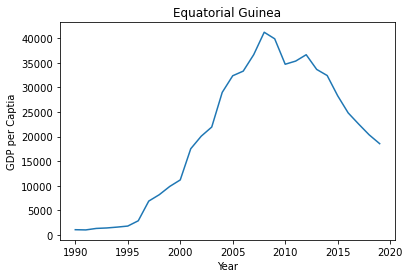

In [17]:
#here the country name is hardcoded.  see video 
# Equatorial Guinea
gdp_High = gdp_df.loc[gdp_df['Country'] == 'Equatorial Guinea']
plt.plot(gdp_High["Year"], gdp_High["GDP_Per_Capita"])
plt.xlabel("Year")
plt.ylabel("GDP per Captia")
plt.title("Equatorial Guinea")

Text(0.5, 1.0, 'China')

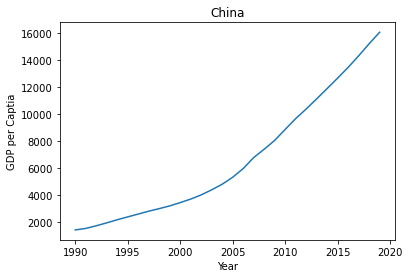

In [18]:
# China
gdp_High2 = gdp_df.loc[gdp_df['Country'] == 'China']
plt.plot(gdp_High2["Year"], gdp_High2["GDP_Per_Capita"])
plt.xlabel("Year")
plt.ylabel("GDP per Captia")
plt.title("China")

### Part 17
Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [19]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


### Part 18
- Merge gdp_df and continents. 
- Keep only the countries that appear in both data frames. 
- Save the result back to gdp_df.

In [20]:
gdp_df = pd.merge(left = continents, 
         right = gdp_df, 
         left_on = 'Country', 
         right_on = 'Country')
gdp_df

,Continent,Country,Year,GDP_Per_Capita
0,Asia,Afghanistan,2019,2065.036398
1,Asia,Afghanistan,2018,2033.779002
2,Asia,Afghanistan,2017,2058.383832
3,Asia,Afghanistan,2016,2057.062164
4,Asia,Afghanistan,2015,2068.265904
...,...,...,...,...
5438,Africa,Zimbabwe,1994,3263.934978
5439,Africa,Zimbabwe,1993,3033.504852
5440,Africa,Zimbabwe,1992,3054.889178
5441,Africa,Zimbabwe,1991,3426.598094


### Part 19. 
Determine the number of countries per continent. Create a bar chart showing this.
- Africa: 49
- Asia: 43
- Europe: 45
- North America: 26
- Oceania: 14
- South America: 11

In [21]:
CPC = gdp_df.groupby('Continent')['Country'].nunique()
print(CPC)

Continent
Africa           49
Asia             43
Europe           45
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'Oceania'),
  Text(5, 0, 'South America')])

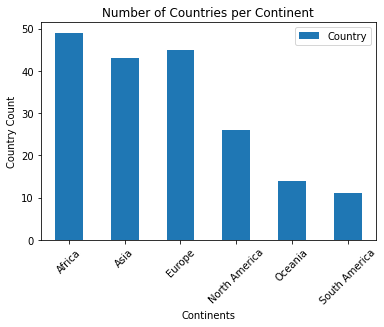

In [22]:
CPC.plot(kind = 'bar');
plt.xlabel("Continents")
plt.ylabel("Country Count")
plt.title("Number of Countries per Continent")
plt.legend()
plt.xticks(rotation=45)

**Part 20** Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?
- In Asia, during 2014, there seems to be a larger group of countries who's upper GDP are statistical outliers.  There also appear to be outliers among the outliers of Asian countries in terms of GDP.

In [23]:
SNSBox = gdp_df #.set_index("Continent")
(SNSBox[SNSBox['Year'].isin([2014])]).pivot_table(values='GDP_Per_Capita', index='Continent', columns="Country", margins_name="all").stack().dropna()


Continent      Country     
Africa         Algeria         11512.705405
               Angola           8239.828837
               Benin            2975.853914
               Botswana        17264.437133
               Burkina Faso     1907.950515
                                   ...     
South America  Guyana          11244.312669
               Paraguay        11612.389911
               Peru            11877.084063
               Suriname        18187.183961
               Uruguay         20582.168953
Length: 188, dtype: float64

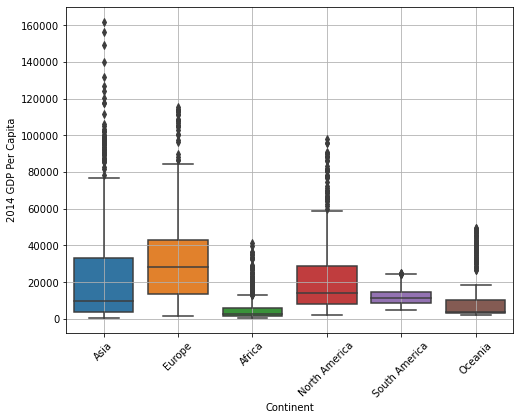

In [24]:
fig, ax = plt.subplots(figsize = (8,6))

sns.boxplot(x = SNSBox["Continent"], y = SNSBox['GDP_Per_Capita']);
plt.ylabel("2014 GDP Per Capita")
plt.xticks(rotation=45)
plt.grid()

**Part 21**
Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`.

In [25]:
life_expectancy = (
    pd.read_csv(
        '../data/life_expectancy.csv',
        header = 2)
)

In [26]:
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN


**Part 22.**
Drop the Country Code, Indicator Name, and Indicator Code columns. Then use `.melt()` to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [27]:
life_expectancy = (
    life_expectancy
        .drop(columns = [
            'Country Code',
            'Indicator Name',
            'Indicator Code'])
        .melt(
            id_vars = 'Country Name',
            var_name = 'Year',
            value_name = 'life_expectancy')
        .rename(
            columns = {
                'Country Name' : 'Country',
                'Year' : 'Year',
                'life_expectancy' : 'Life_Expectancy'})
        .dropna())
life_expectancy.head()

,Country,Year,Life_Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000


In [28]:
life_expectancy[life_expectancy['Life_Expectancy'] > 80].sort_values('Year').head()

,Country,Year,Life_Expectancy
9695,Japan,1996,80.200244
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
10204,"Hong Kong SAR, China",1998,80.131707
10227,Japan,1998,80.501463


**Part 23.** What was the first country with a life expectancy to exceed 80?
- Japan

In [29]:
life_expectancy[life_expectancy['Life_Expectancy'] >= 80].sort_values('Year')

,Country,Year,Life_Expectancy
9695,Japan,1996,80.200244
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
10204,"Hong Kong SAR, China",1998,80.131707
10227,Japan,1998,80.501463
...,...,...,...
16037,France,2020,82.175610
16038,Faroe Islands,2020,83.092683
16041,United Kingdom,2020,80.902439
16053,Guam,2020,80.277000


**Part 24.** Merge `gdp_per_capita` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [30]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Continent       5443 non-null   object 
 1   Country         5443 non-null   object 
 2   Year            5443 non-null   int64  
 3   GDP_Per_Capita  5443 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 212.6+ KB


In [31]:
life_expectancy['Year'] = life_expectancy['Year'].astype(int)

In [32]:
gdp_le = pd.merge(
    left = gdp_df,
    right = life_expectancy)
gdp_le

,Continent,Country,Year,GDP_Per_Capita,Life_Expectancy
0,Asia,Afghanistan,2019,2065.036398,64.833
1,Asia,Afghanistan,2018,2033.779002,64.486
2,Asia,Afghanistan,2017,2058.383832,64.130
3,Asia,Afghanistan,2016,2057.062164,63.763
4,Asia,Afghanistan,2015,2068.265904,63.377
...,...,...,...,...,...
4917,Africa,Zimbabwe,1994,3263.934978,52.044
4918,Africa,Zimbabwe,1993,3033.504852,53.653
4919,Africa,Zimbabwe,1992,3054.889178,55.243
4920,Africa,Zimbabwe,1991,3426.598094,56.749


**Part 25.** Create a new DataFrame, named `gdp_le_2019` by extracting data for the year 2019 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2019?

In [33]:
gdp_le_2019 = gdp_le[gdp_le['Year'] == 2019]
gdp_le_2019

,Continent,Country,Year,GDP_Per_Capita,Life_Expectancy
0,Asia,Afghanistan,2019,2065.036398,64.833
18,Europe,Albania,2019,13724.058790,78.573
48,Africa,Algeria,2019,11510.557088,76.880
78,Africa,Angola,2019,6670.332297,61.147
108,North America,Antigua and Barbuda,2019,21910.184985,77.016
...,...,...,...,...,...
4776,Oceania,Vanuatu,2019,3153.015168,70.474
4806,Asia,Vietnam,2019,8041.178551,75.400
4836,Asia,West Bank and Gaza,2019,6219.960291,74.053
4862,Africa,Zambia,2019,3470.448801,63.886


**Part 26.** Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [34]:
top_3_gdp = gdp_le_2019.nlargest(3, 'GDP_Per_Capita')['Country'].to_list()
top_3_gdp

['Macao SAR, China', 'Luxembourg', 'Singapore']

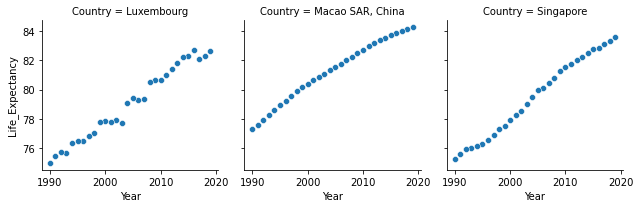

In [35]:
g = sns.FacetGrid(data = gdp_le[gdp_le['Country'].isin(top_3_gdp)],
             col = 'Country')
g.map(sns.scatterplot, 'Year', 'Life_Expectancy');

**Part 27.** Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?
- The data look like a curvalinear function.

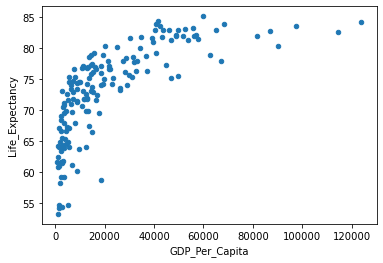

In [36]:
gdp_le_2019.plot(kind = 'scatter', x = 'GDP_Per_Capita', y = 'Life_Expectancy');

**Part 28.** Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?
 - The number means that gdp per capita and life expectation are highly correlated.  GDP is a strong indicator for life expectancy in the year 2019.

In [37]:
gdp_le_2019[['GDP_Per_Capita', 'Life_Expectancy']].corr()

,GDP_Per_Capita,Life_Expectancy
GDP_Per_Capita,1.000000,0.709018
Life_Expectancy,0.709018,1.000000


**Part 29.** Add a column to `gdp_le_2019` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.
- The shape of the data changed from a "curvy" distribution to one that more resembles a linear trend.  When viewd as log transformed values, the correlation rose significantly.

In [38]:
gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])

/tmp/ipykernel_86260/2740929984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])


In [39]:
gdp_le_2019

,Continent,Country,Year,GDP_Per_Capita,Life_Expectancy,log_gdp
0,Asia,Afghanistan,2019,2065.036398,64.833,7.632903
18,Europe,Albania,2019,13724.058790,78.573,9.526906
48,Africa,Algeria,2019,11510.557088,76.880,9.351020
78,Africa,Angola,2019,6670.332297,61.147,8.805425
108,North America,Antigua and Barbuda,2019,21910.184985,77.016,9.994707
...,...,...,...,...,...,...
4776,Oceania,Vanuatu,2019,3153.015168,70.474,8.056114
4806,Asia,Vietnam,2019,8041.178551,75.400,8.992331
4836,Asia,West Bank and Gaza,2019,6219.960291,74.053,8.735519
4862,Africa,Zambia,2019,3470.448801,63.886,8.152039


In [40]:
gdp_le_2019.corr()

,Year,GDP_Per_Capita,Life_Expectancy,log_gdp
Year,NaN,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.709018,0.851629
Life_Expectancy,NaN,0.709018,1.000000,0.848498
log_gdp,NaN,0.851629,0.848498,1.000000


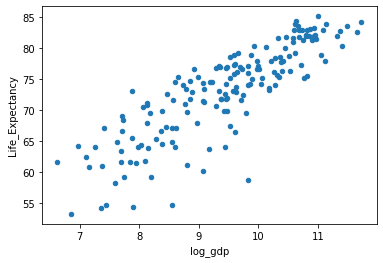

In [41]:
gdp_le_2019.plot(kind = 'scatter', x = 'log_gdp', y = 'Life_Expectancy');

### Solo Exploration and Presentation:

1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations or trends that you find. 

# Exploration parameters

**Data:** The data set comes from the UNdata database and was collected by the UNESCO Institute for Statistics (UIS).  It lists a country's annual public expenditure on education as a percent of GDP.

**What I hope to learn:**  Is there a relationship between changes in GDP and a country's educational investement?

**Challenges:**  

1) In the data, educational spending is expressed as a percentage of a country's annual GDP, and not as a country's total annual educational spending.  

2) These data are not in decimal form and will need to be converted. Total educational expendature will need to be derived.  

3) I am also unsure of the shape of my dataset and which countries whould provide sufficient continuous observations to draw comparisons.

4) I am unsure of the correct statistical analysis show a potential relationship.

In [42]:
#Load Government expenditure on education as % of GDP dataset.
#Check for junk data at top and bottom of data set
#Drop columns not neccessary for this analysis
#Rename Columns to make compatable with GDP Dataset
edu_df = (
    pd.read_csv('../data/Gov_Edu_Spen_Pers_GDP.csv')
    .drop(columns = ['Sex',
                     'Age group',
                     'Units of measurement'])
    .rename(columns = {
        'Reference Area': 'Country',
    'Time Period': 'Year',
    'Observation Value': "Edu_Percent"})
)
edu_df.head(n=5)

,Country,Year,Edu_Percent
0,Afghanistan,2014,4.80435
1,Afghanistan,2013,4.54436
2,Afghanistan,2012,3.12562
3,Afghanistan,2011,4.08791
4,Afghanistan,2010,4.51116


**Note:** Converting percentages to decimals and storing it in a new column "Edu_Dec."  It worked.

In [43]:
edu_df['Edu_Dec'] = edu_df["Edu_Percent"] / 100
edu_df.head(n=1)

,Country,Year,Edu_Percent,Edu_Dec
0,Afghanistan,2014,4.80435,0.048044


**Side Quest** I graduated high school in 2004. I wonder what which countries were in the top 5 in terms of highest percent GDP investment in education? I'll take a slice up some nostalgia!
- Looks like Lesotho, Cuba, Djibouti, Denmark, and Ghana!

In [44]:
nostalgia = edu_df.loc[edu_df['Year'] == 2004].sort_values(by = 'Edu_Percent', ascending = False)
nostalgia.head()


,Country,Year,Edu_Percent,Edu_Dec
1651,Lesotho,2004,13.27157,0.132716
712,Cuba,2004,10.26828,0.102683
819,Djibouti,2004,9.26467,0.092647
794,Denmark,2004,8.21189,0.082119
1081,Ghana,2004,7.53558,0.075356


In [45]:
top_5_2004 = nostalgia.nlargest(5, 'Edu_Percent')['Country'].to_list()
top_5_2004

['Lesotho', 'Cuba', 'Djibouti', 'Denmark', 'Ghana']

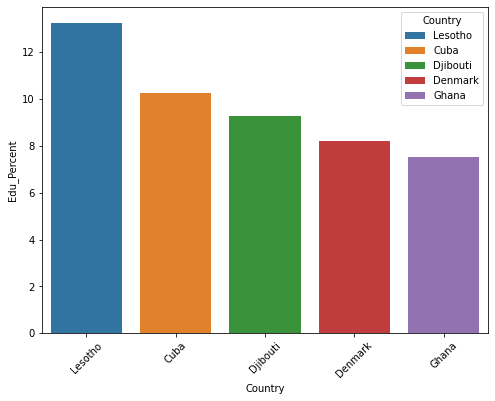

In [46]:
fig, ax = plt.subplots(figsize = (8,6))

sns.barplot(data = nostalgia[nostalgia['Country'].isin(top_5_2004)],
    x = 'Country',
    y = 'Edu_Percent',
    hue = 'Country',
    dodge = False,
)
plt.xticks(rotation = 45);

In [47]:
#Checking Dtype
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      3195 non-null   object 
 1   Year         3195 non-null   int64  
 2   Edu_Percent  3195 non-null   float64
 3   Edu_Dec      3195 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 100.0+ KB


**Note:** There are only 197 countries represented in this dataset.  This is fewer than the 238 represented in the gdp_df dataset.

In [48]:
#Checking for unique countries
edu_df['Country'].nunique()
#print('There are '+ str(edu_df['Country'].nunique()))

197

**Note:** There seems to be a larger concentration of observations between the years of **1999** and **2011**.  These years are also represented in the gdp_df.  I might have more complete information if I limit my focus to those years.

In [49]:
#Checking years represented
edu_df['Year'].value_counts().sort_index()

1975     55
1976     50
1977     50
1978     49
1979     56
1980     65
1981     57
1982     61
1983     55
1984     58
1985     55
1986     61
1987     55
1988     55
1989     57
1990     53
1991     55
1992     58
1993     58
1994     71
1995     82
1996     81
1997     38
1998     92
1999    120
2000    122
2001    118
2002    127
2003    114
2004    126
2005    113
2006    113
2007    115
2008    126
2009    120
2010    125
2011    113
2012     95
2013     78
2014     41
2015      2
Name: Year, dtype: int64

**Note:**  I'm going to merge edu_df and gdp_df dataframes.

In [50]:
# Merge gdp_df and edu_df, Dropping Saving changes back to edu_df
edu_spend = pd.merge(
    left = gdp_df,
    right = edu_df,
    how='right', 
    on='Year'
).dropna()
edu_spend

,Continent,Country_x,Year,GDP_Per_Capita,Country_y,Edu_Percent,Edu_Dec
0,Asia,Afghanistan,2014,2102.385234,Afghanistan,4.80435,0.048044
1,Europe,Albania,2014,11623.866679,Afghanistan,4.80435,0.048044
2,Africa,Algeria,2014,11512.705405,Afghanistan,4.80435,0.048044
3,Africa,Angola,2014,8239.828837,Afghanistan,4.80435,0.048044
4,North America,Antigua and Barbuda,2014,18104.241470,Afghanistan,4.80435,0.048044
...,...,...,...,...,...,...,...
429903,Asia,Uzbekistan,1990,3416.724096,Zimbabwe,12.45426,0.124543
429904,Oceania,Vanuatu,1990,2888.309393,Zimbabwe,12.45426,0.124543
429905,Asia,Vietnam,1990,1673.249634,Zimbabwe,12.45426,0.124543
429906,Africa,Zambia,1990,2190.182814,Zimbabwe,12.45426,0.124543


2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).